In [1]:
# !pip install opencv-python transformers accelerate
from diffusers import StableDiffusionControlNetImg2ImgPipeline, ControlNetModel, UniPCMultistepScheduler
from diffusers.utils import load_image
import numpy as np
import torch

import cv2
from PIL import Image

# download an image
image = load_image(
    "https://hf.co/datasets/huggingface/documentation-images/resolve/main/diffusers/input_image_vermeer.png"
)
np_image = np.array(image)

# get canny image
np_image = cv2.Canny(np_image, 100, 200)
np_image = np_image[:, :, None]
np_image = np.concatenate([np_image, np_image, np_image], axis=2)
canny_image = Image.fromarray(np_image)


In [2]:

# load control net and stable diffusion v1-5
controlnet = ControlNetModel.from_pretrained("./pretrained_10epoch", torch_dtype=torch.float16)


In [3]:
pipe = StableDiffusionControlNetImg2ImgPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=controlnet, torch_dtype=torch.float16
)

unet\diffusion_pytorch_model.safetensors not found


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [4]:




# speed up diffusion process with faster scheduler and memory optimization
pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()

# generate image
generator = torch.manual_seed(0)
image = pipe(
    "futuristic-looking woman",
    num_inference_steps=20,
    generator=generator,
    image=image,
    control_image=canny_image,
).images[0]

  0%|          | 0/16 [00:00<?, ?it/s]

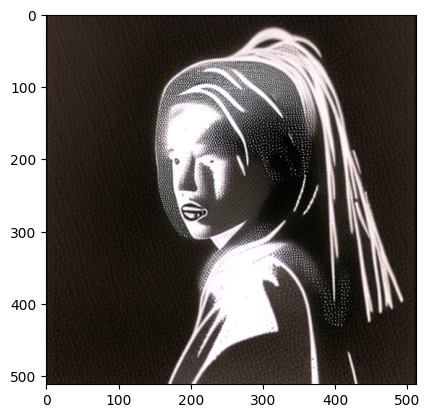

In [5]:
#plot the image
import matplotlib.pyplot as plt
plt.imshow(image)

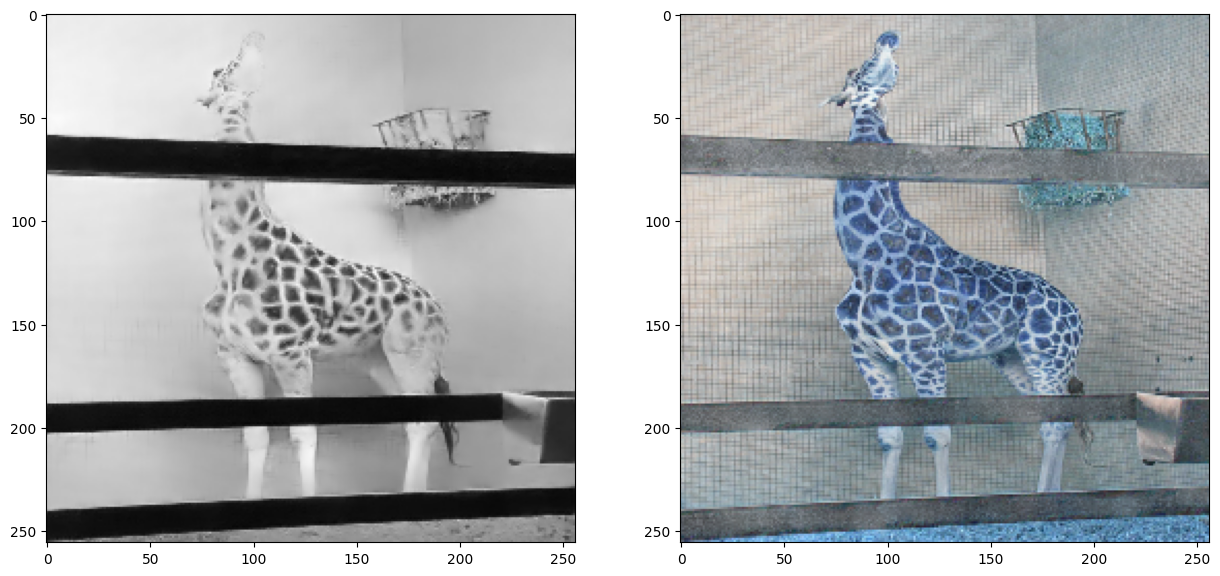

In [6]:
condition_img = load_image('./images/000000531496_pred_alb.png')
image1 = load_image('./images/000000531496_pred_shd.png')

plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.imshow(image1)
plt.subplot(1, 2, 2)
plt.imshow(condition_img)
plt.show()

In [7]:

# generate image
generator = torch.manual_seed(1)
image = pipe(
    " ",
    num_inference_steps=40,
    generator=generator,
    image=image1,
    control_image=condition_img,
).images[0]

  0%|          | 0/32 [00:00<?, ?it/s]

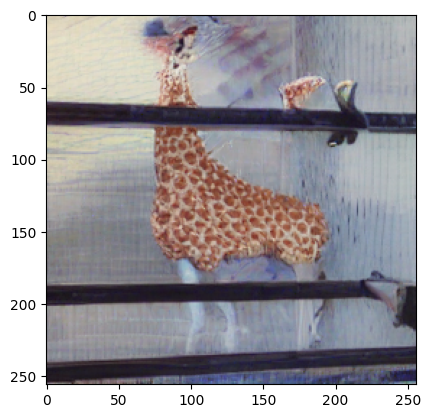

In [8]:
plt.imshow(image)

In [9]:
def render_diffreal(shadow, albedo):
    input_image = load_image(shadow)
    condition_img = load_image(albedo)
    #draw the input image and the condition image
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,1)
    plt.imshow(input_image)
    plt.subplot(1,2,2)
    plt.imshow(condition_img)
    plt.show()
    #generate the diffreal image
    target = pipe(
    "",
    num_inference_steps=40,
    generator=generator,
    image=input_image,
    control_image=condition_img,
    ).images[0]
    #draw the diffreal image
    plt.figure(figsize=(10,10))
    plt.imshow(target)
    plt.show()
    

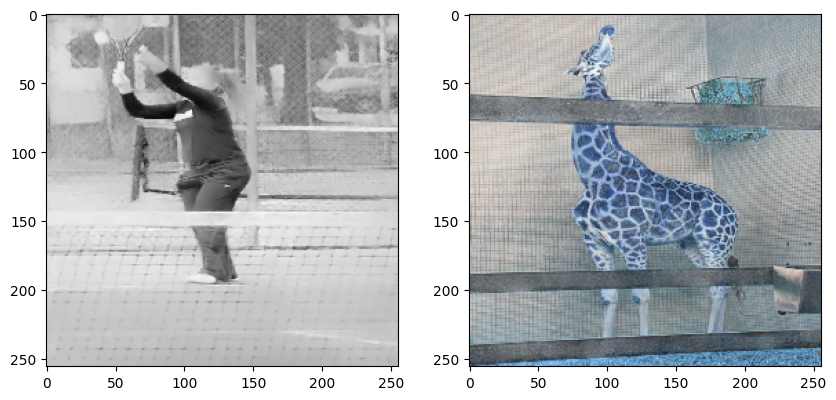

  0%|          | 0/32 [00:00<?, ?it/s]

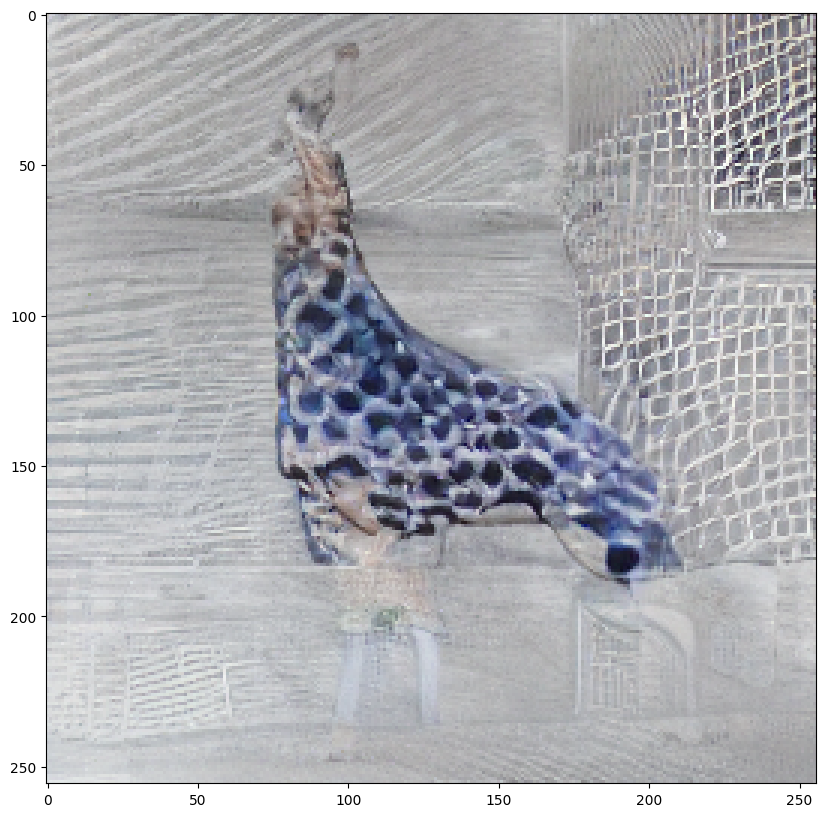

In [10]:
render_diffreal("./images/000000004070_pred_shd.png", "./images/000000531496_pred_alb.png")

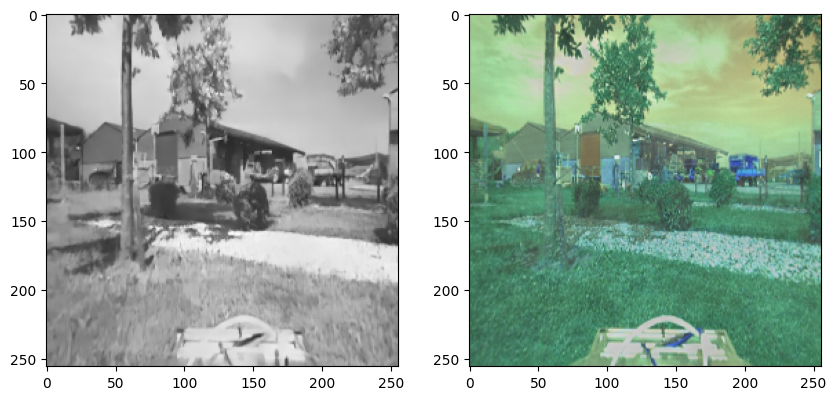

  0%|          | 0/32 [00:00<?, ?it/s]

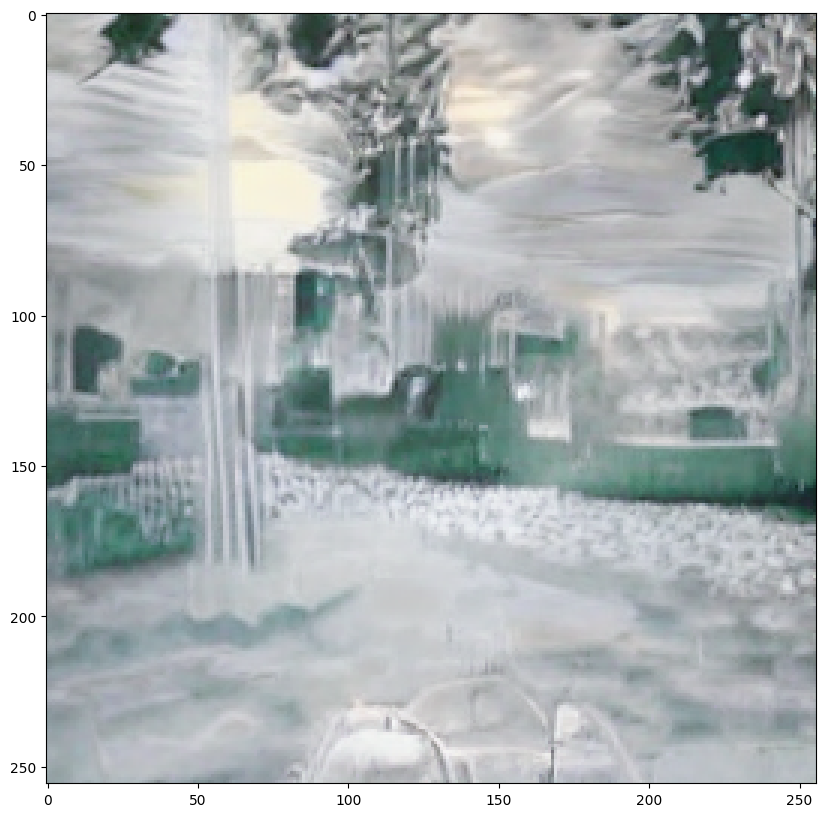

In [11]:
render_diffreal("./images/uvc_camera_cam_0_f01240_undist_pred_shd.png", "./images/uvc_camera_cam_0_f01240_undist_pred_alb.png")

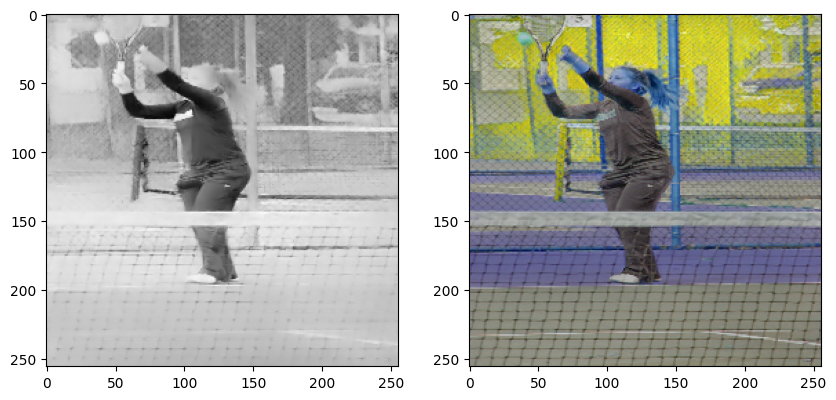

  0%|          | 0/32 [00:00<?, ?it/s]

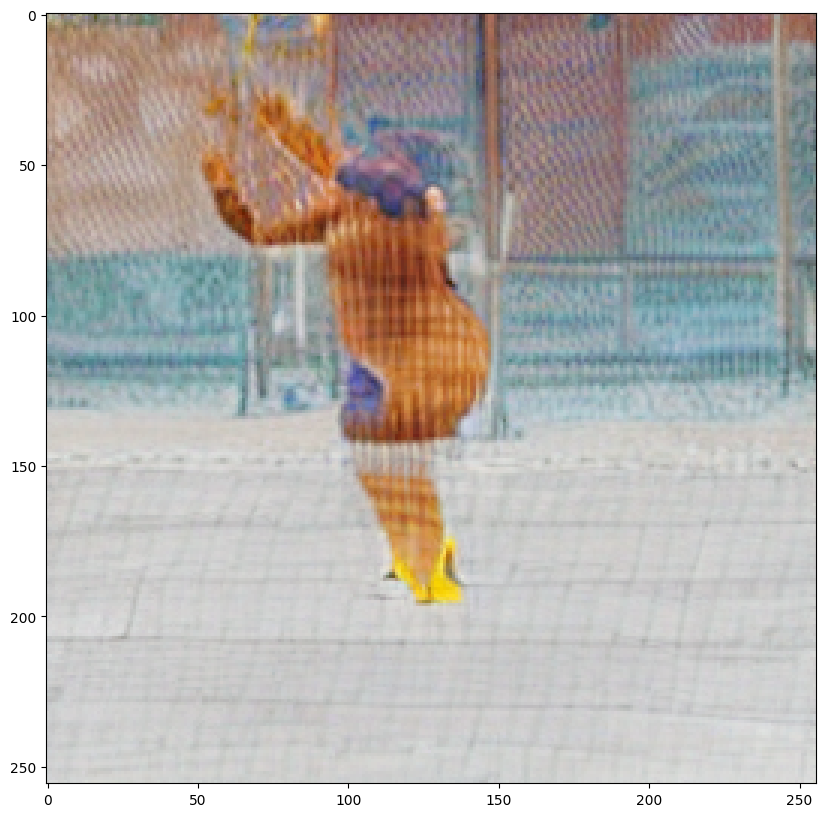

In [12]:
render_diffreal("./images/000000004070_pred_shd.png","./images/000000004070_pred_alb.png")

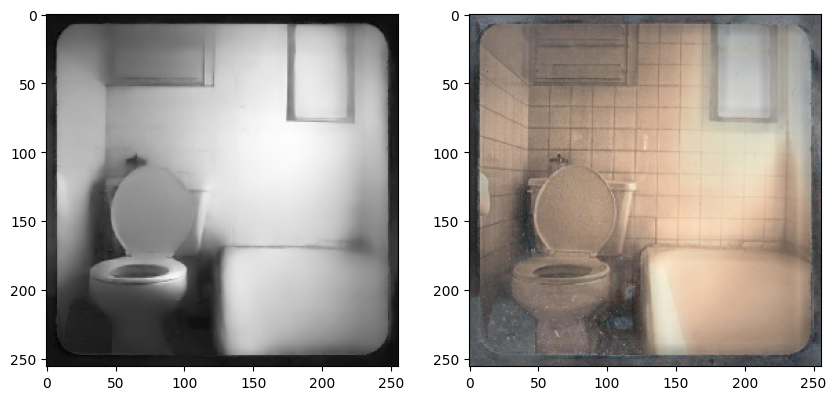

  0%|          | 0/32 [00:00<?, ?it/s]

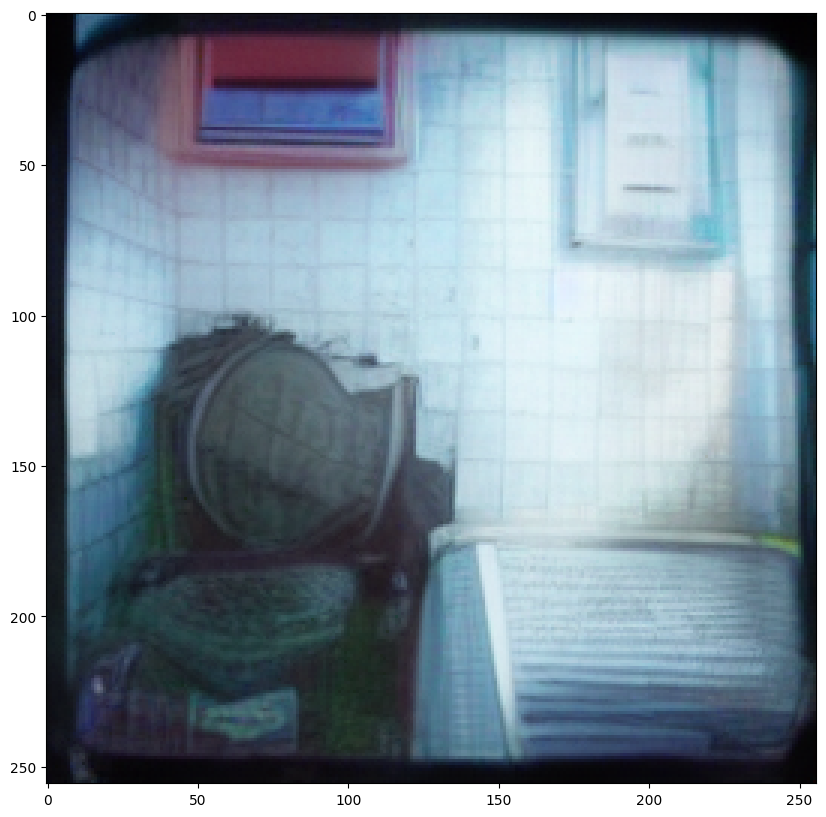

In [13]:
render_diffreal("./images/000000053820_pred_shd.png","./images/000000053820_pred_alb.png")

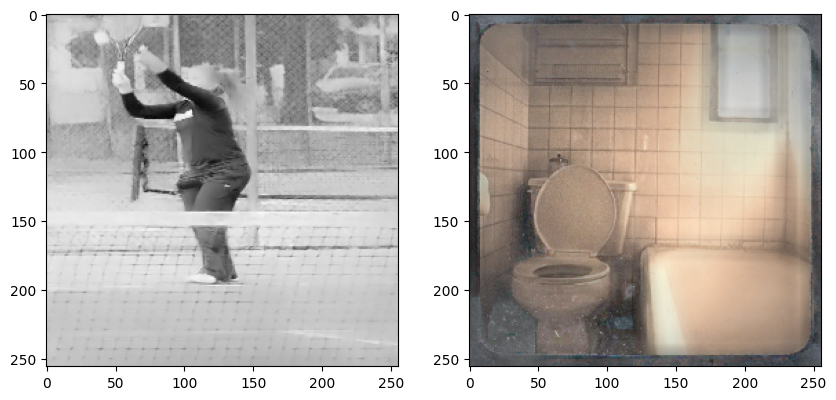

  0%|          | 0/32 [00:00<?, ?it/s]

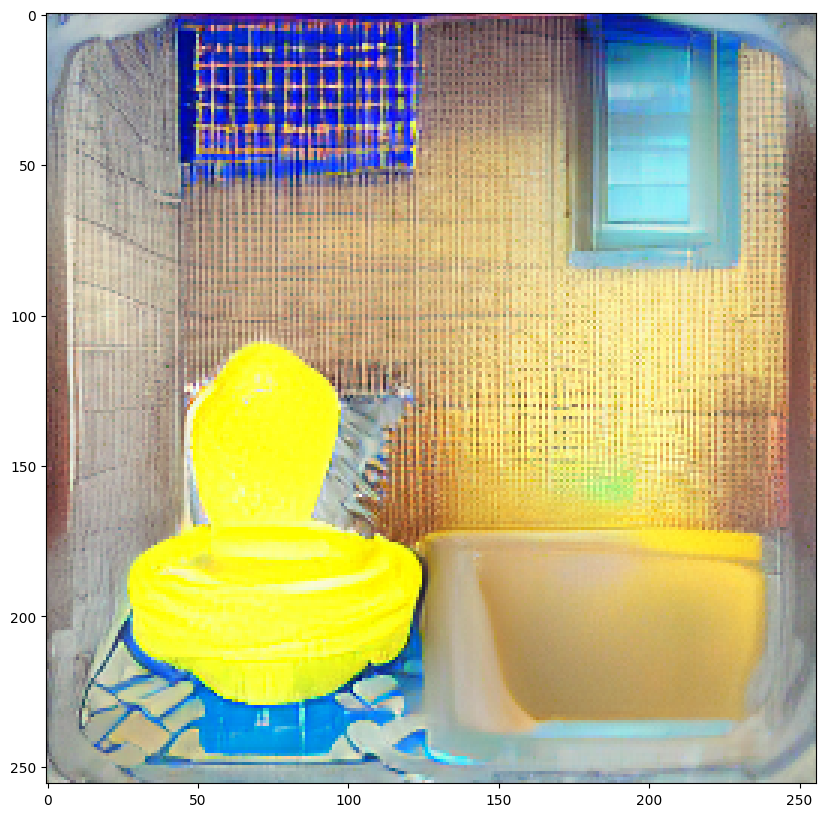

In [14]:
render_diffreal("./images/000000004070_pred_shd.png","./images/000000053820_pred_alb.png")